#Librerias

In [ ]:
pip uninstall matplotlib


Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)?   ERROR: Operation cancelled by user


In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight') 
import seaborn as sns
import pandas as pd

%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from fbprophet import Prophet
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime
import scipy
from scipy import stats

#ARIMA NETO
Menos historial
Más historial

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

https://www.javatpoint.com/arima-model-in-python#:~:text=ARIMA%2C%20abbreviated%20for%20'Auto%20Regressive,order%20to%20forecast%20future%20values.

In [ ]:
url = 'https://raw.githubusercontent.com/Javimitri/data/main/AYU_RU_viernes.csv'
df = pd.read_csv(url)
data = pd.read_csv(url)

#prueba con menos historial
data2=data.iloc[0:300,:]
data_neto=data2['neto']
#data2["fecha"] = pd.to_datetime(data2["fecha"])

#prueba con mas historial
df = df['neto']
df2 = pd.read_csv(url)

#MENOS HISTORIAL

##plots

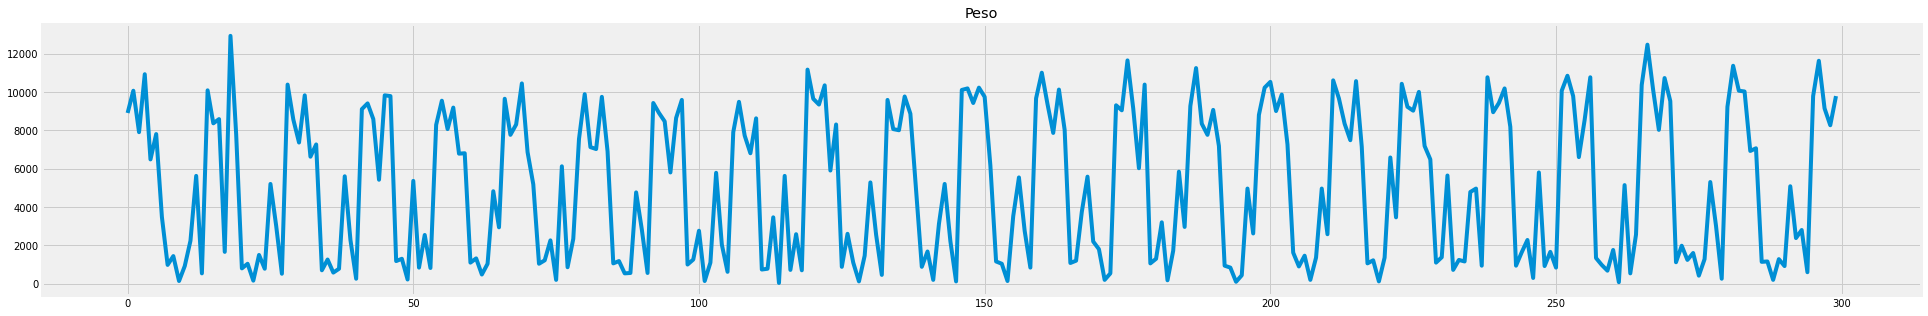

In [ ]:
#Visualizacion
plt.figure(figsize=(30, 5))
plt.plot(data_neto)
plt.title('Peso')
plt.grid(True)
plt.show();

In [ ]:
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

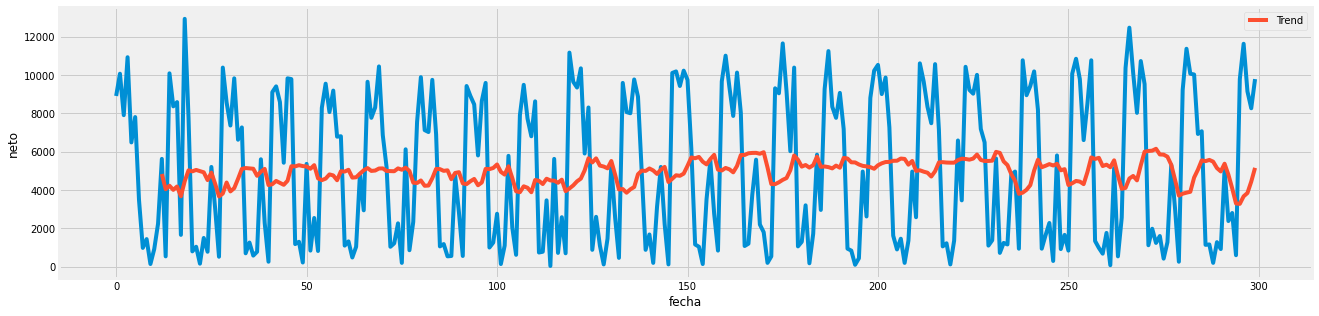

In [ ]:
trend = running_average(data_neto, 12)

fig, ax = plt.subplots(1, 1,figsize=(20,5))
ax.plot(data2.index, data_neto)
ax.set_xlabel('fecha')
ax.set_ylabel('neto')
ax.plot(data2.index[12:], trend, label='Trend')
ax.legend()

In [ ]:
#Seasonal Decompose Plots
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(data_neto, freq=7)
a.plot();

TypeError: ignored

In [ ]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

NameError: ignored

<Figure size 1152x504 with 0 Axes>

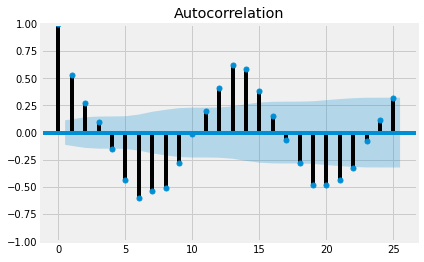

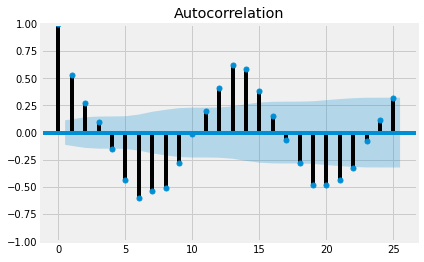

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_neto)

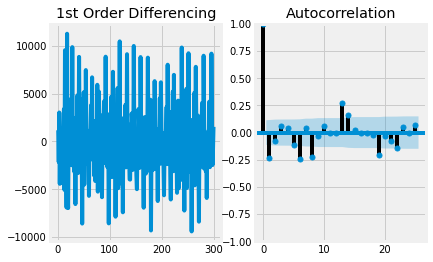

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(data_neto.diff())

ax2=f.add_subplot(122)
plot_acf(data_neto.diff().dropna(),ax=ax2)
plt.show()

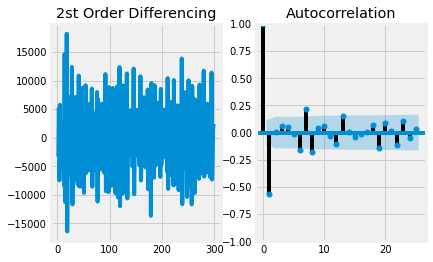

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2st Order Differencing')
ax1.plot(data_neto.diff().diff())

ax2=f.add_subplot(122)
plot_acf(data_neto.diff().diff().dropna(),ax=ax2)
plt.show()

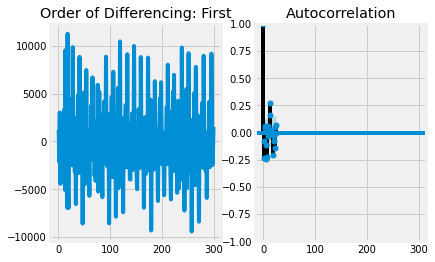

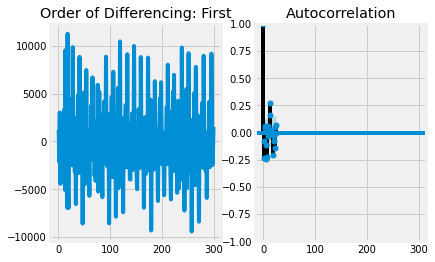

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(data_neto.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(data_neto.diff().dropna(), ax = axes[1])  

##estadísticas

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data_neto.dropna())

print("ADF :",result[0])
print("p-value :",result[1])
print("num of lags :",result[2])
print("num of observations used for ADR Regression and Critical Values Calculation :",result[3])
print("critical values: ")
for key, val in result[4].items():
  print("\t",key,": ", val)

ADF : -4.4725449781588775
p-value : 0.00022036449120806543
num of lags : 14
num of observations used for ADR Regression and Critical Values Calculation : 285
critical values: 
	 1% :  -3.4535050041524245
	 5% :  -2.8717352599720294
	 10% :  -2.5722024776854417


##selección del modelo
Se calcula un p-valor del modelo de 1.7636e-15. El orden de diferenciación correspondiente con este valor es 0 por lo que se toma que el valor d el orden de diff.\
El siguiente valor que se tiene que calcular es el p, correspondiente al modelo autorregresivo. Se observa que la gráfica de autocorrelación de primer y de segundo orden el primer retraso es el que se muestra más significativo.\
Por último, el valor q se estima a través de la gráfica ACF. Mediante la cantidad de retrasos que cruzan el umbral. Con esta observación, se determinan cuantos datos del pasado se pueden considerar significativos para el modelo.


In [ ]:
arima_model=ARIMA(data_neto,order=(1,0,2))
model=arima_model.fit()
print(model.summary())

NotImplementedError: ignored

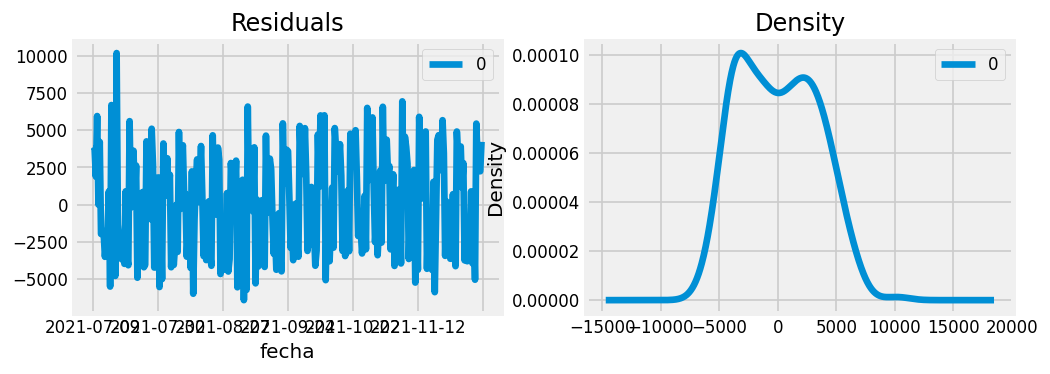

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Crear modelo ARIMA  
mymodel = ARIMA(data_neto, order = (1, 0, 2))  
modelfit = mymodel.fit()  
  
# Plotting Residual Errors  
myresiduals = pd.DataFrame(modelfit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

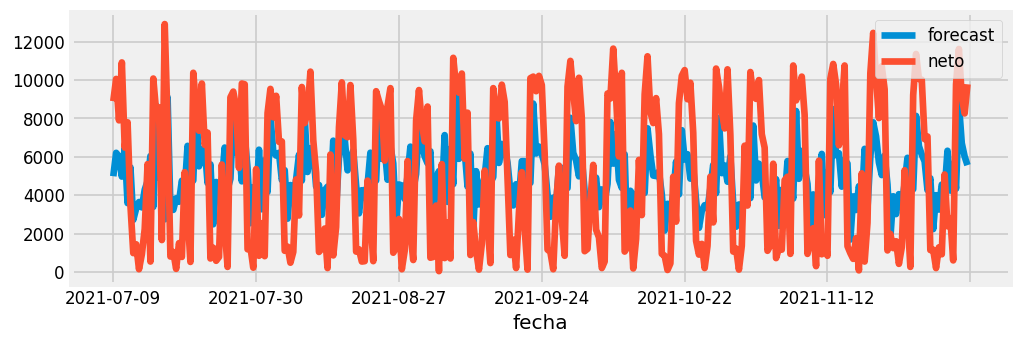

In [ ]:
import numpy as np, pandas as pd  
from statsmodels.tsa.arima_model import ARIMA  
import matplotlib.pyplot as plt  
  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Actual vs Fitted  
modelfit.plot_predict(dynamic = False)  
plt.show()  

##ARIMA

In [ ]:
#X = data2['neto']
train_data, test_data = data_neto[0:len(data_neto)-200], df[len(data_neto)-200:] #600 y 600

history = [x for x in train_data]
model = ARIMA(history, order=(1,0,2)) #ARIMA(history, order=(5,1,0))
model_fit = model.fit()

arima_pred = model_fit.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
train_data

ValueError: ignored

In [ ]:
test_data.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

#MAS HISTORIAL

##plots

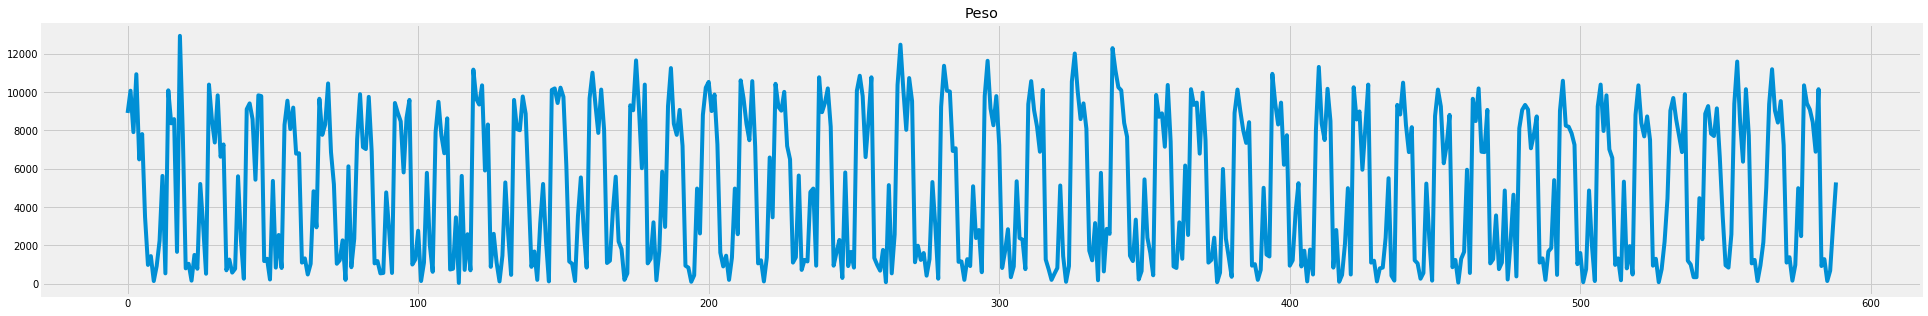

In [ ]:
#Visualizacion
plt.figure(figsize=(30, 5))
plt.plot(df)
plt.title('Peso')
plt.grid(True)
plt.show();

In [ ]:
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

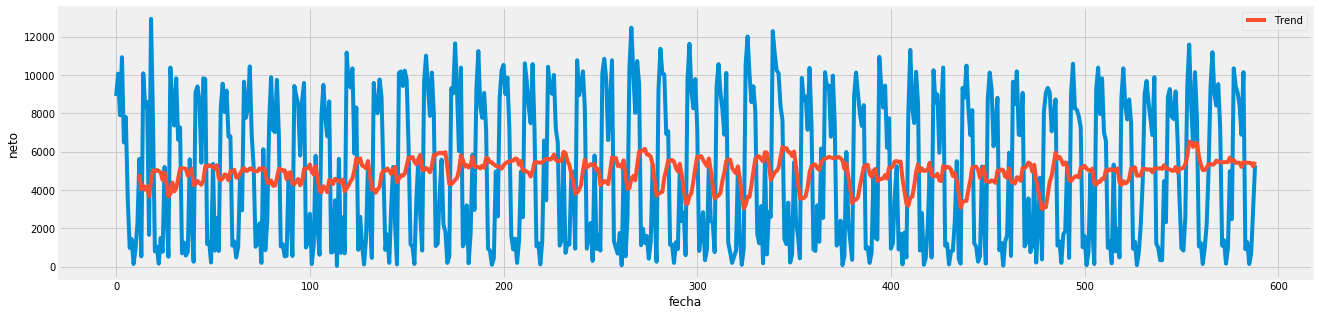

In [ ]:
trend = running_average(df, 12)

fig, ax = plt.subplots(1, 1,figsize=(20,5))
ax.plot(df.index, df)
ax.set_xlabel('fecha')
ax.set_ylabel('neto')
ax.plot(df.index[12:], trend, label='Trend')
ax.legend()

https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453

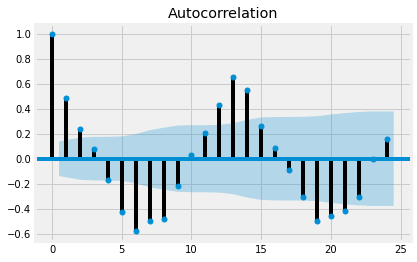

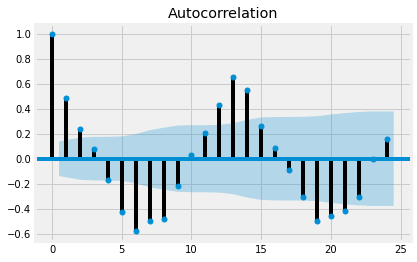

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_neto)

https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/

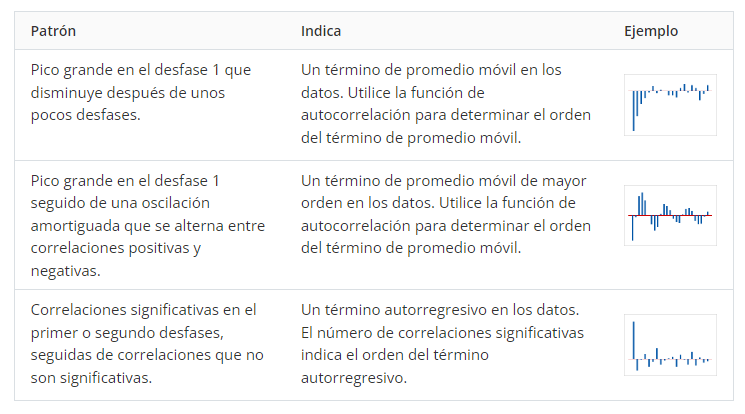

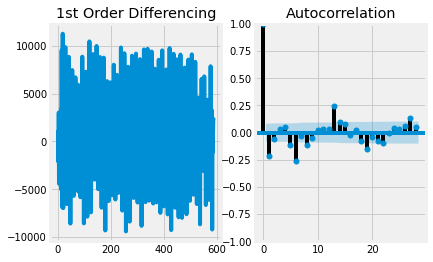

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.diff())

ax2=f.add_subplot(122)
plot_acf(df.diff().dropna(),ax=ax2)
plt.show()

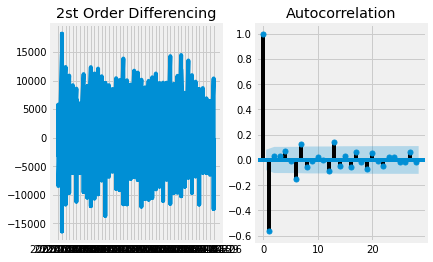

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2st Order Differencing')
ax1.plot(df.diff().diff())

ax2=f.add_subplot(122)
plot_acf(df.diff().diff().dropna(),ax=ax2)
plt.show()

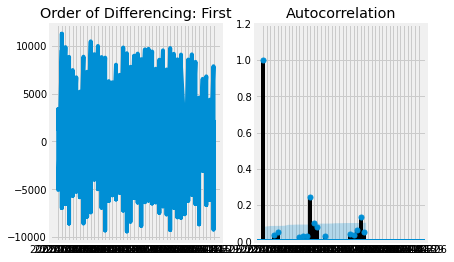

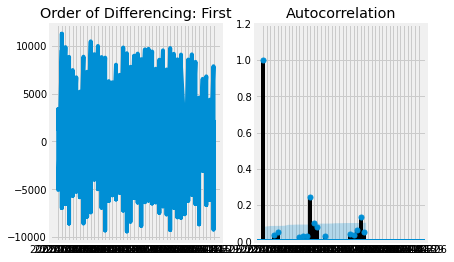

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(df.diff().dropna(), ax = axes[1])  

##estadística

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())

print("ADF :",result[0])
print("p-value :",result[1])
print("num of lags :",result[2])
print("num of observations used for ADR Regression and Critical Values Calculation :",result[3])
print("critical values: ")
for key, val in result[4].items():
  print("\t",key,": ", val)

ADF : -9.222584418820075
p-value : 1.7636196106174776e-15
num of lags : 12
num of observations used for ADR Regression and Critical Values Calculation : 576
critical values: 
	 1% :  -3.441753961421302
	 5% :  -2.866570853087291
	 10% :  -2.5694492998890817


Se calcula un p-valor del modelo de 1.7636e-15. El orden de diferenciación correspondiente con este valor es 0 por lo que se toma que el valor d el orden de diff. \
d=0

##selección del modelo
El siguiente valor que se tiene que calcular es el p, correspondiente al modelo autorregresivo. Se observa que la gráfica de autocorrelación de primer y de segundo orden el primer retraso es el que se muestra más significativo.\
Por último, el valor q se estima a través de la gráfica ACF. Mediante la cantidad de retrasos que cruzan el umbral. Con esta observación, se determinan cuantos datos del pasado se pueden considerar significativos para el modelo.


In [ ]:
arima_model=ARIMA(df,order=(1,0,2))
model=arima_model.fit()
model_predict=model.predict()
#print(model.summary())
(model_predict)

0      4935.408114
1      6182.360950
2      5994.616364
3      4952.542251
4      6469.407265
          ...     
584     939.469979
585    3757.187757
586    2432.914617
587    3825.266697
588    4508.305427
Length: 589, dtype: float64

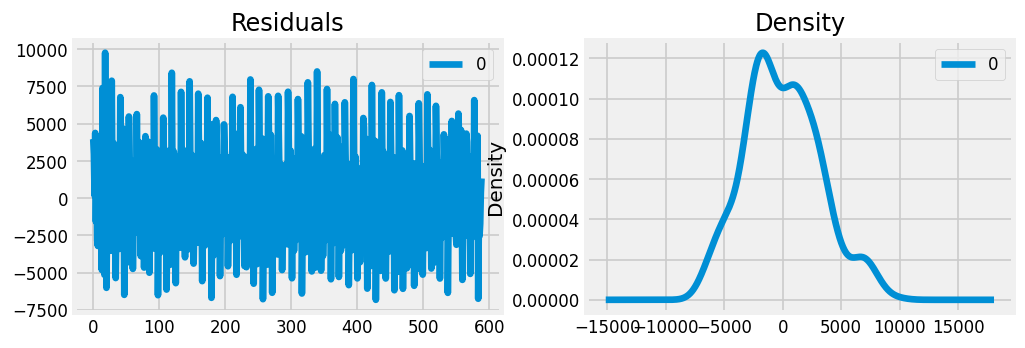

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})   
  
# Plotting Residual Errors  
myresiduals = pd.DataFrame(model.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

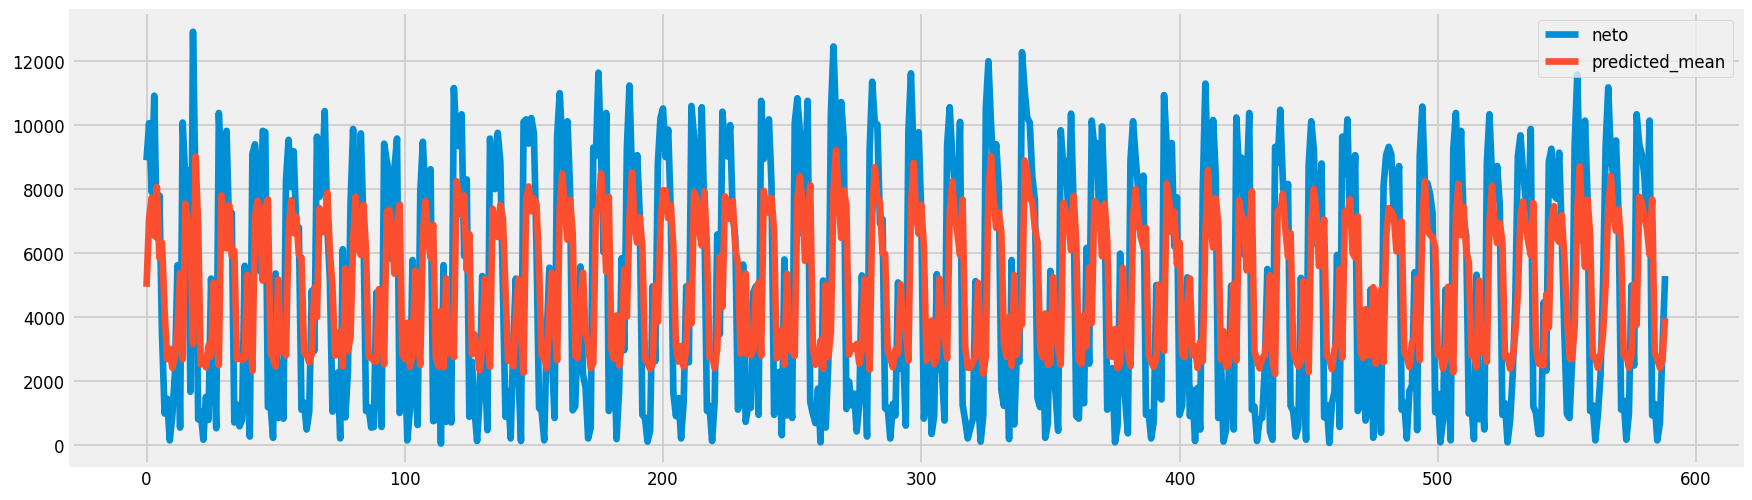

In [ ]:
df.plot(figsize = (16,5), legend=True)
model_predict.plot(legend = True);

#ARIMA

In [ ]:
#X = data2['neto']
train_data, test_data = df[0:len(df)-200], df[len(df)-200:] #600 y 600

history = [x for x in train_data]
model = ARIMA(history, order=(1,0,2))
model_fit = model.fit()

arima_pred = model_fit.predict(start = len(train_data), end = len(df)-1)
train_data

0       8900.0
1      10060.0
2       7900.0
3      10920.0
4       6480.0
        ...   
384     7980.0
385     7340.0
386     8420.0
387      940.0
388     1020.0
Name: neto, Length: 389, dtype: float64

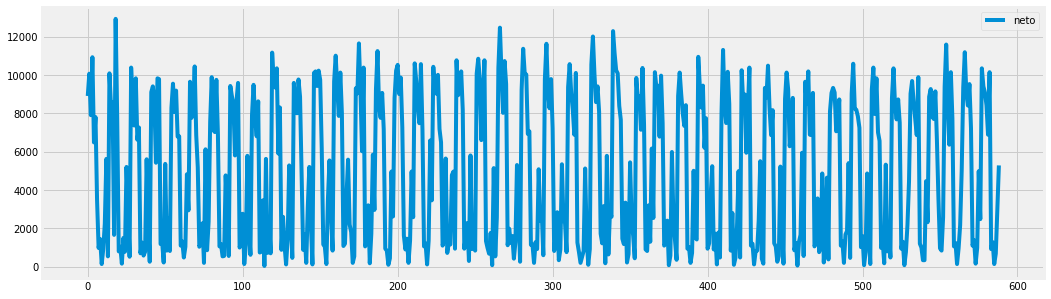

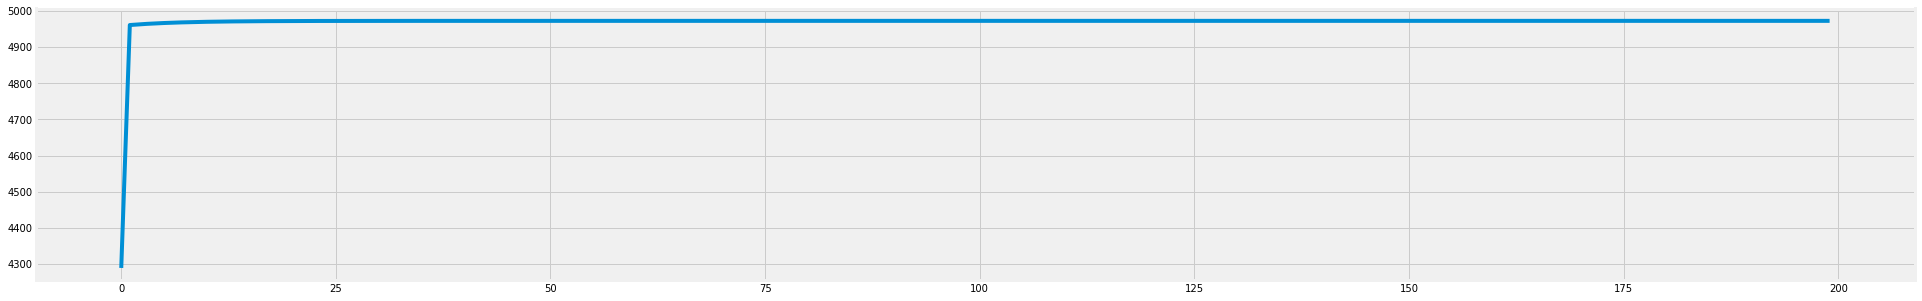

In [ ]:
df.plot(figsize = (16,5), legend=True)
plt.figure(figsize=(30, 5))
plt.plot(arima_pred)
#arima_pred.plot(legend = True)

otra forma

predicted=2712.587083, expected=200.000000
predicted=2712.587083, expected=720.000000
predicted=2712.587083, expected=5000.000000
predicted=2712.587083, expected=1520.000000
predicted=2712.587083, expected=1420.000000
predicted=2712.587083, expected=10940.000000
predicted=2712.587083, expected=9400.000000
predicted=2712.587083, expected=8300.000000
predicted=2712.587083, expected=9440.000000
predicted=2712.587083, expected=6200.000000
predicted=2712.587083, expected=7740.000000
predicted=2712.587083, expected=940.000000
predicted=2712.587083, expected=1220.000000
predicted=2712.587083, expected=3720.000000
predicted=2712.587083, expected=5240.000000
predicted=2712.587083, expected=900.000000
predicted=2712.587083, expected=1720.000000
predicted=2712.587083, expected=120.000000
predicted=2712.587083, expected=1780.000000
predicted=2712.587083, expected=480.000000
predicted=2712.587083, expected=8000.000000
predicted=2712.587083, expected=11300.000000
predicted=2712.587083, expected=8340

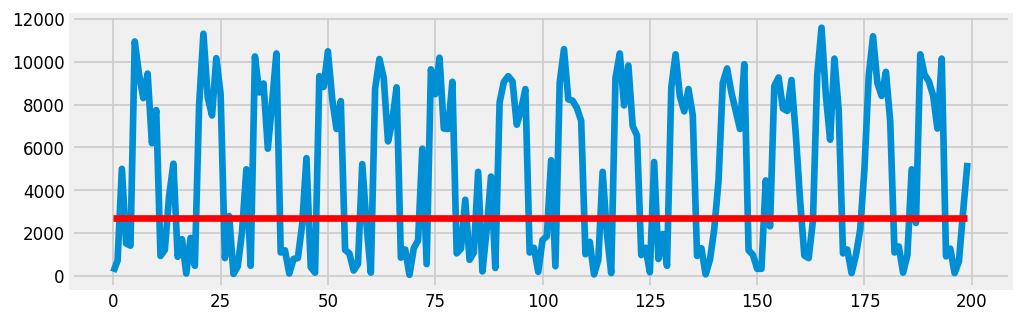

In [ ]:
X = data['neto']
X = X.values
train, test = X[0:len(X)-200], X[len(X)-200:] #600 y 600


history = [x for x in train]
predictions = list()
model = ARIMA(history, order=(1,0,2))
model_fit = model.fit()
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

https://www.youtube.com/watch?v=8FCDpFhd1zk&t=3s

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.1 MB/s 
     |████████████████████████████████| 9.8 MB 52.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima
stepwise_fit=auto_arima(df,trace=True,
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11194.536, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11391.278, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11189.825, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11236.531, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11969.101, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11191.710, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11191.739, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11193.831, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11290.190, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.400 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  589
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5591.912
Date:                Sat, 02 Jul 2022   AIC                          11189.825
Time:                        22:34:48   BIC                          11202.960
Sample:                             0   HQIC                         11194.942
                                - 589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2266.2174    213.452     10.617      0.000    1847.860    2684.575
ar.L1          0.5417      0.037     14.460      0.000       0.468       0.615
sigma2      1.032e+07      0.050   2.05e+08      0.000    1.03e+07    1.03e+07
===================================================================================
Ljung-Box (Q):                      533.76   Jarque-Bera (JB):                10.13
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.92   Skew:                             0.31
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+23. Standard errors may be unstable.
"""

In [ ]:
train, test = df[0:len(df)-200], df[len(df)-200:] #600 y 600

In [ ]:
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()

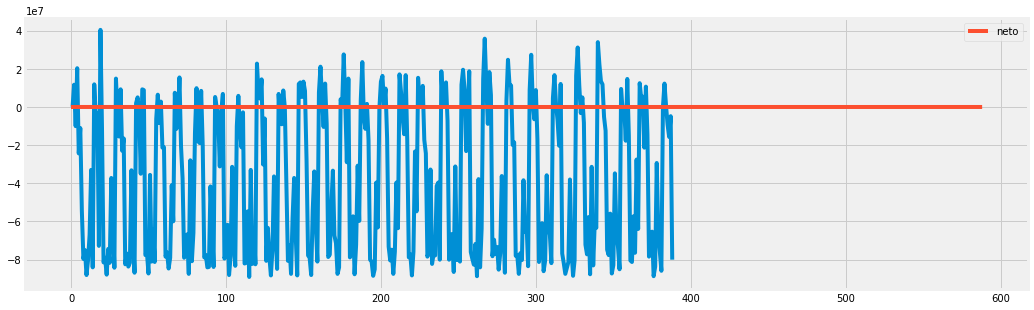

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(train)
plt.plot(pred)
df.plot(figsize = (16,5), legend=True)
#pred index=df index[start endell

In [ ]:
history = [x for x in train]
predictions = list()
model = ARIMA(history, order=(1,0,2))
model_fit = model.fit()
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

#ARIMA COMBUSTIBLE

#PROPHET